# Data Exploration: SECOM & WM-811K Datasets
==========================================

This notebook explores both datasets for the AEOC project.

In [1]:
import sys
sys.path.insert(0, '..')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

# Paths
DATA_DIR = Path('../data/processed')
SECOM_DIR = DATA_DIR / 'secom'
WM811K_DIR = DATA_DIR / 'wm811k'

## 1. SECOM Dataset Exploration

In [2]:
# Load SECOM data
secom_features = pd.read_csv(SECOM_DIR / 'secom_features.csv')
secom_labels = pd.read_csv(SECOM_DIR / 'secom_labels.csv')

print("=" * 60)
print("SECOM DATASET OVERVIEW")
print("=" * 60)
print(f"\nFeatures shape: {secom_features.shape}")
print(f"Labels shape: {secom_labels.shape}")
print(f"\nFirst few feature columns: {list(secom_features.columns[:10])}")
print(f"\nLast few feature columns: {list(secom_features.columns[-5:])}")

SECOM DATASET OVERVIEW

Features shape: (1567, 591)
Labels shape: (1567, 2)

First few feature columns: ['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9']

Last few feature columns: ['feature_586', 'feature_587', 'feature_588', 'feature_589', 'label']


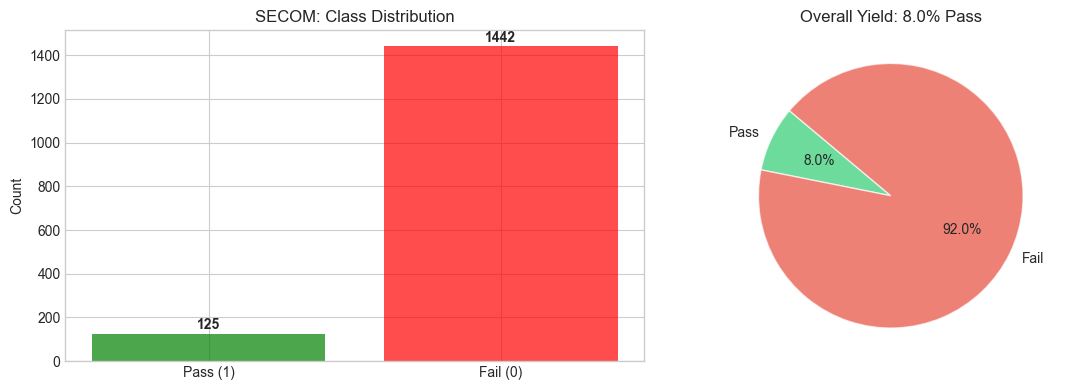


Class Distribution:
  Pass (1): 125 samples (8.0%)
  Fail (0): 1442 samples (92.0%)


In [ ]:
# Class distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Class counts
label_counts = secom_labels['label'].value_counts()
axes[0].bar(['Pass (1)', 'Fail (0)'], [label_counts.get(1, 0), label_counts.get(0, 0)], 
            color=['green', 'red'], alpha=0.7)
axes[0].set_title('SECOM: Class Distribution')
axes[0].set_ylabel('Count')
for i, v in enumerate([label_counts.get(1, 0), label_counts.get(0, 0)]):
    axes[0].text(i, v + 20, str(v), ha='center', fontweight='bold')

# Pie chart
pass_rate = label_counts.get(1, 0) / len(secom_labels) * 100
axes[1].pie([label_counts.get(1, 0), label_counts.get(0, 0)], labels=['Pass', 'Fail'], 
           autopct='%1.1f%%', startangle=140,
           colors=['#2ecc71', '#e74c3c'], 
           wedgeprops={'alpha': 0.7, 'edgecolor': 'w'})
axes[1].set_title(f'Overall Yield: {pass_rate:.1f}% Pass')

plt.tight_layout()
plt.show()

print(f"\nClass Distribution:")
print(f"  Pass (1): {label_counts.get(1, 0)} samples ({pass_rate:.1f}%)")
print(f"  Fail (0): {label_counts.get(0, 0)} samples ({100-pass_rate:.1f}%)")

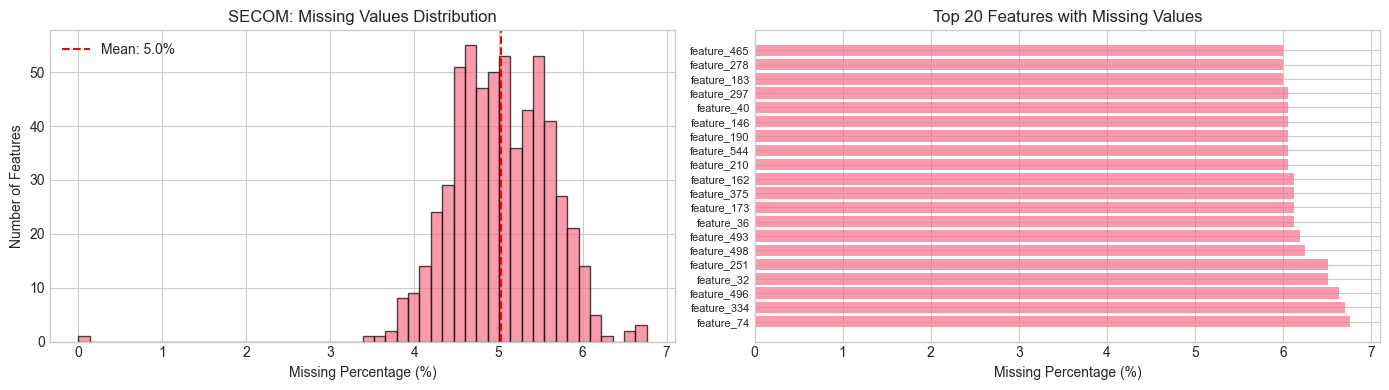


Missing Values Summary:
  Total features: 591
  Features with missing: 590
  Average missing: 5.02%
  Max missing: 6.76%


In [11]:
# Missing values analysis
missing_pct = (secom_features.isnull().sum() / len(secom_features) * 100)

fig, axes = plt.subplots(1, 2, figsize=(14, 4))

# Missing values histogram
axes[0].hist(missing_pct, bins=50, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Missing Percentage (%)')
axes[0].set_ylabel('Number of Features')
axes[0].set_title('SECOM: Missing Values Distribution')
axes[0].axvline(missing_pct.mean(), color='red', linestyle='--', label=f'Mean: {missing_pct.mean():.1f}%')
axes[0].legend()

# Features with most missing
top_missing = missing_pct[missing_pct > 0].sort_values(ascending=False).head(20)
axes[1].barh(range(len(top_missing)), top_missing.values, alpha=0.7)
axes[1].set_yticks(range(len(top_missing)))
axes[1].set_yticklabels(top_missing.index[:20], fontsize=8)
axes[1].set_xlabel('Missing Percentage (%)')
axes[1].set_title('Top 20 Features with Missing Values')

plt.tight_layout()
plt.show()

print(f"\nMissing Values Summary:")
print(f"  Total features: {len(secom_features.columns)}")
print(f"  Features with missing: {(missing_pct > 0).sum()}")
print(f"  Average missing: {missing_pct.mean():.2f}%")
print(f"  Max missing: {missing_pct.max():.2f}%")

In [12]:
# Feature statistics (sample of first 20 features)
feature_stats = secom_features.iloc[:, :20].describe()
print("Feature Statistics (first 20 features):")
feature_stats.round(2)

Feature Statistics (first 20 features):


,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19
count,1492.00,1491.00,1483.00,1492.00,1482.00,1494.00,1479.00,1483.00,1491.00,1473.00,1498.00,1491.00,1494.00,1500.00,1485.00,1489.00,1482.00,1489.00,1500.00,1487.00
mean,0.03,0.04,-0.02,-0.04,-0.03,-0.03,0.03,0.01,0.00,-0.03,0.04,-0.00,-0.05,-0.01,-0.02,-0.01,0.01,0.02,-0.01,0.01
std,0.97,0.99,0.99,1.01,0.98,1.00,1.01,0.99,1.02,0.97,0.99,0.99,1.02,0.98,0.97,0.98,0.99,1.01,1.04,1.00
min,-3.13,-3.00,-3.58,-3.79,-3.57,-3.27,-3.56,-3.60,-3.19,-2.88,-2.85,-2.87,-3.73,-3.40,-3.22,-3.30,-3.04,-3.16,-3.44,-3.23
25%,-0.64,-0.66,-0.69,-0.71,-0.70,-0.69,-0.66,-0.64,-0.65,-0.73,-0.64,-0.69,-0.75,-0.66,-0.66,-0.68,-0.64,-0.66,-0.67,-0.68
50%,0.06,-0.00,-0.02,-0.03,-0.05,-0.03,-0.00,-0.02,0.02,-0.01,0.03,-0.01,-0.06,0.01,-0.01,-0.01,0.02,0.04,-0.02,-0.02
75%,0.68,0.71,0.65,0.65,0.63,0.68,0.73,0.68,0.69,0.65,0.66,0.69,0.63,0.60,0.66,0.64,0.72,0.68,0.71,0.69
max,2.98,3.09,3.92,3.50,3.71,3.28,3.25,2.99,3.51,2.94,3.53,3.21,3.75,3.13,2.99,3.24,2.99,3.18,3.27,3.14


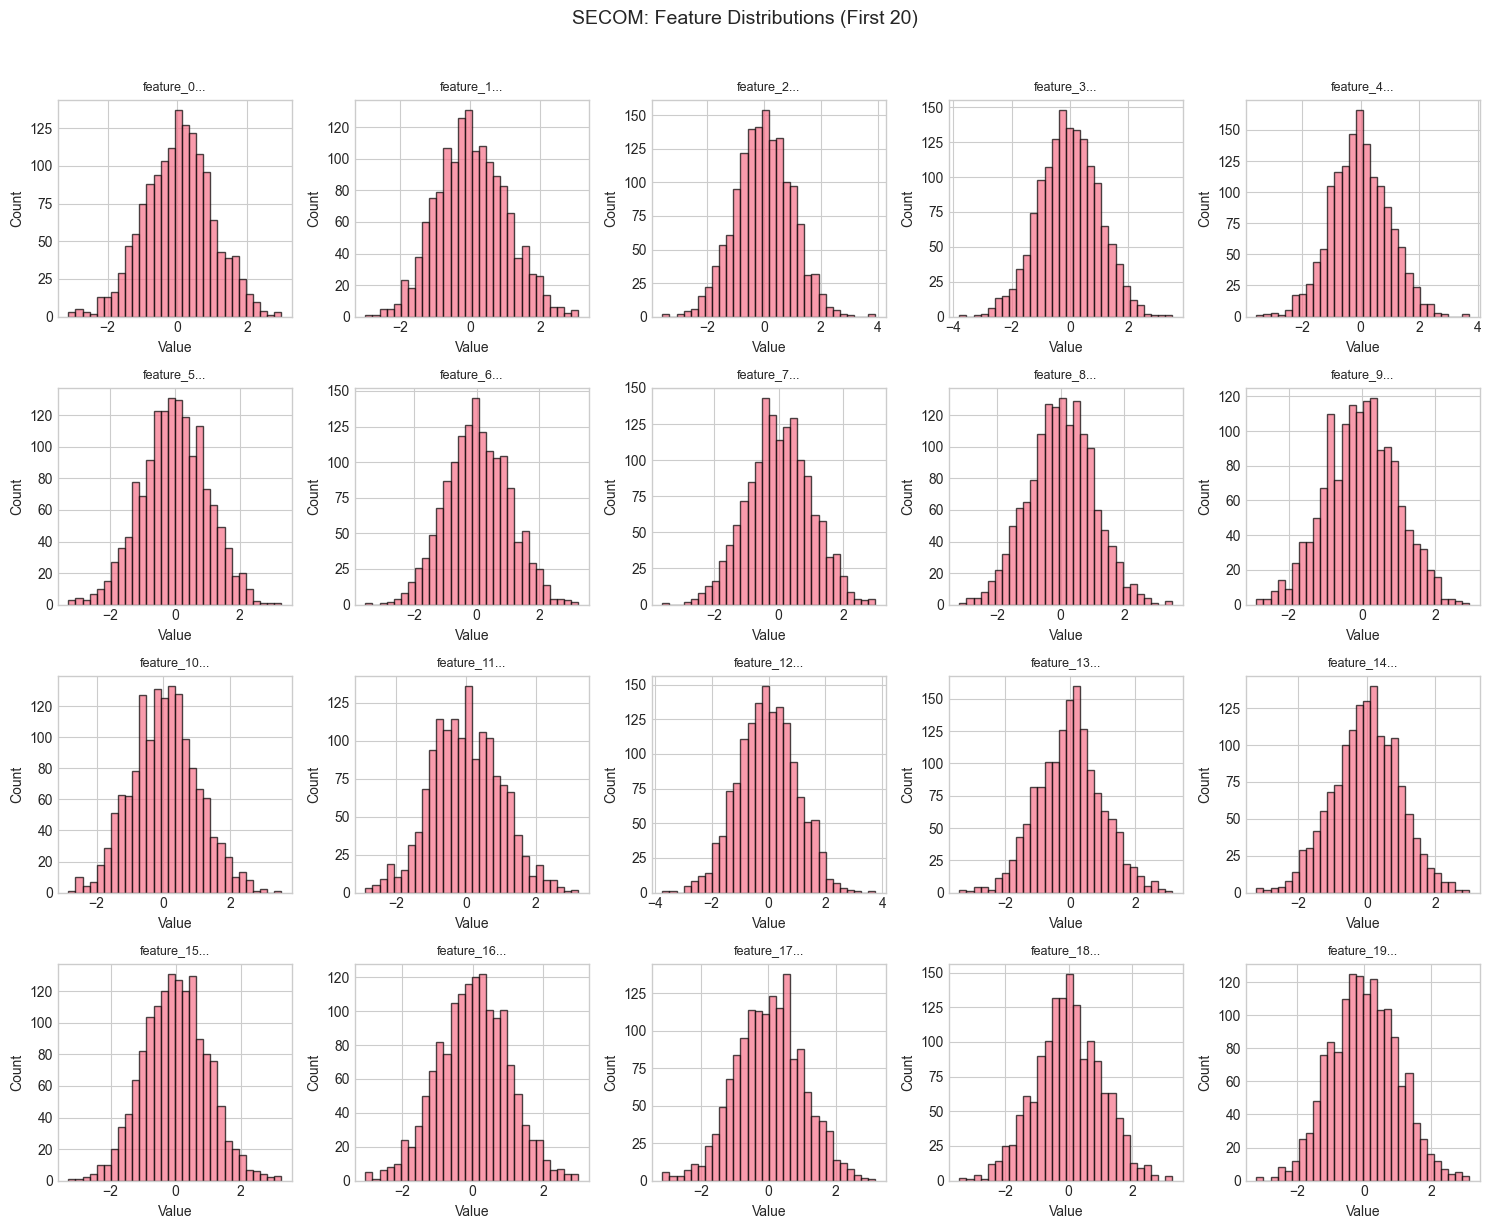

In [13]:
# Feature distributions
fig, axes = plt.subplots(4, 5, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(secom_features.columns[:20]):
    data = secom_features[col].dropna()
    axes[i].hist(data, bins=30, alpha=0.7, edgecolor='black')
    axes[i].set_title(f'{col[:12]}...', fontsize=9)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Count')

# Hide empty subplots
for i in range(20, len(axes)):
    axes[i].set_visible(False)

plt.suptitle('SECOM: Feature Distributions (First 20)', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

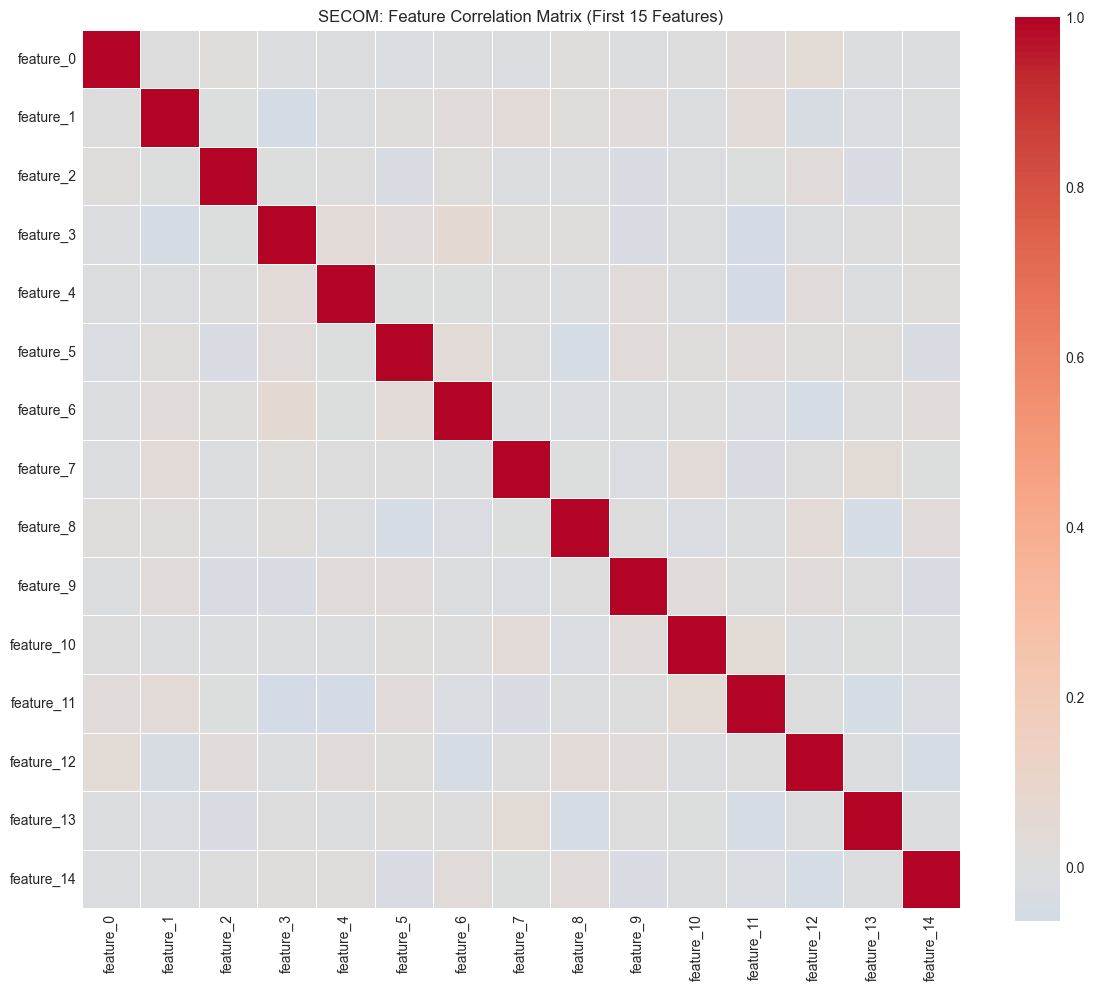

In [14]:
# Correlation matrix for first 15 features
corr_matrix = secom_features.iloc[:, :15].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5)
plt.title('SECOM: Feature Correlation Matrix (First 15 Features)')
plt.tight_layout()
plt.show()

## 2. WM-811K Dataset Exploration

In [15]:
# Load WM-811K data
wm811k = pd.read_csv(WM811K_DIR / 'wm811k_labels.csv')

print("=" * 60)
print("WM-811K DATASET OVERVIEW")
print("=" * 60)
print(f"\nShape: {wm811k.shape}")
print(f"\nColumns: {list(wm811k.columns)}")
print(f"\nFirst few rows:")
wm811k.head()

WM-811K DATASET OVERVIEW

Shape: (5000, 5)

Columns: ['wafer_id', 'defect_class', 'diameter', 'lot_name', 'failure_ratio']

First few rows:


,wafer_id,defect_class,diameter,lot_name,failure_ratio
0,wafer_000000,random,12,lot_048,0.181537
1,wafer_000001,none,12,lot_070,0.000000
2,wafer_000002,center,6,lot_046,0.171242
3,wafer_000003,edge-ring,8,lot_093,0.058301
4,wafer_000004,center,8,lot_061,0.165388


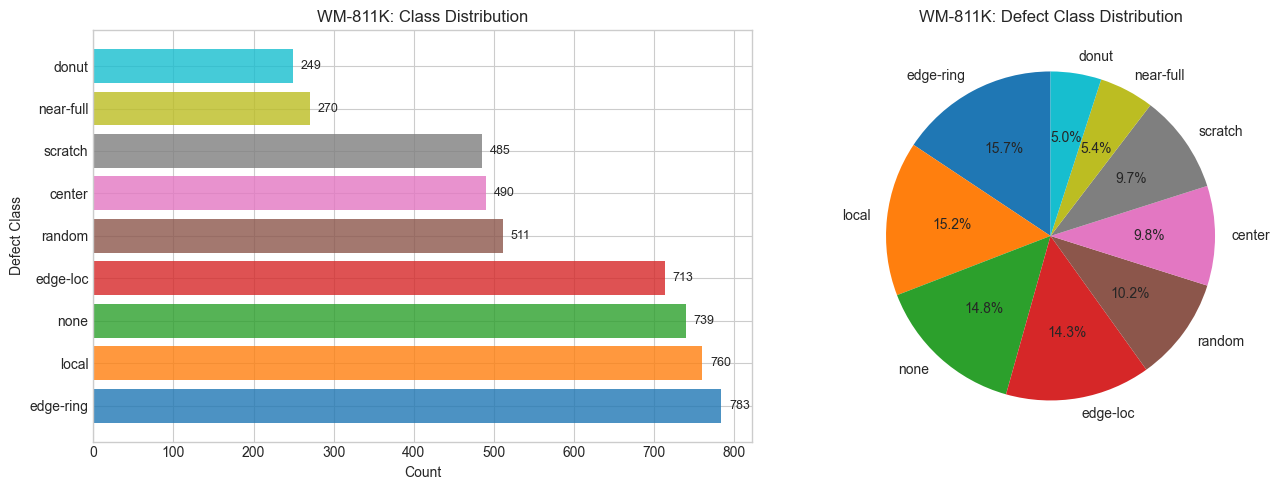


Class Distribution:
  edge-ring   :   783 (15.7%)
  local       :   760 (15.2%)
  none        :   739 (14.8%)
  edge-loc    :   713 (14.3%)
  random      :   511 (10.2%)
  center      :   490 (9.8%)
  scratch     :   485 (9.7%)
  near-full   :   270 (5.4%)
  donut       :   249 (5.0%)


In [16]:
# Class distribution
class_counts = wm811k['defect_class'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart
colors = plt.cm.tab10(np.linspace(0, 1, len(class_counts)))
axes[0].barh(class_counts.index, class_counts.values, color=colors, alpha=0.8)
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Defect Class')
axes[0].set_title('WM-811K: Class Distribution')
for i, v in enumerate(class_counts.values):
    axes[0].text(v + 10, i, str(v), va='center', fontsize=9)

# Pie chart
axes[1].pie(class_counts.values, labels=class_counts.index, autopct='%1.1f%%',
           colors=colors, startangle=90)
axes[1].set_title('WM-811K: Defect Class Distribution')

plt.tight_layout()
plt.show()

print("\nClass Distribution:")
for cls, count in class_counts.items():
    print(f"  {cls:12s}: {count:5d} ({count/len(wm811k)*100:.1f}%)")

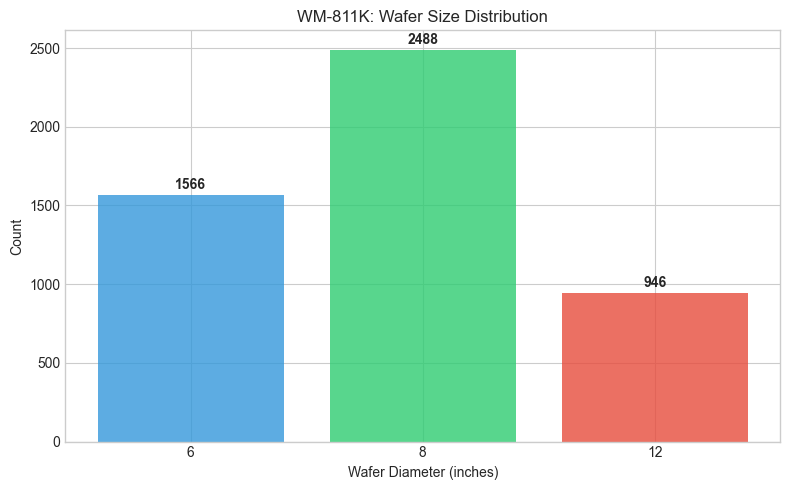


Wafer Diameter Distribution:
  6 inch: 1566 wafers (31.3%)
  8 inch: 2488 wafers (49.8%)
  12 inch: 946 wafers (18.9%)


In [17]:
# Wafer diameter distribution
fig, ax = plt.subplots(figsize=(8, 5))

diameter_counts = wm811k['diameter'].value_counts().sort_index()
bars = ax.bar(diameter_counts.index.astype(str), diameter_counts.values, 
             color=['#3498db', '#2ecc71', '#e74c3c'], alpha=0.8)
ax.set_xlabel('Wafer Diameter (inches)')
ax.set_ylabel('Count')
ax.set_title('WM-811K: Wafer Size Distribution')

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 20,
            f'{int(height)}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("\nWafer Diameter Distribution:")
for dia, count in diameter_counts.items():
    print(f"  {dia} inch: {count} wafers ({count/len(wm811k)*100:.1f}%)")

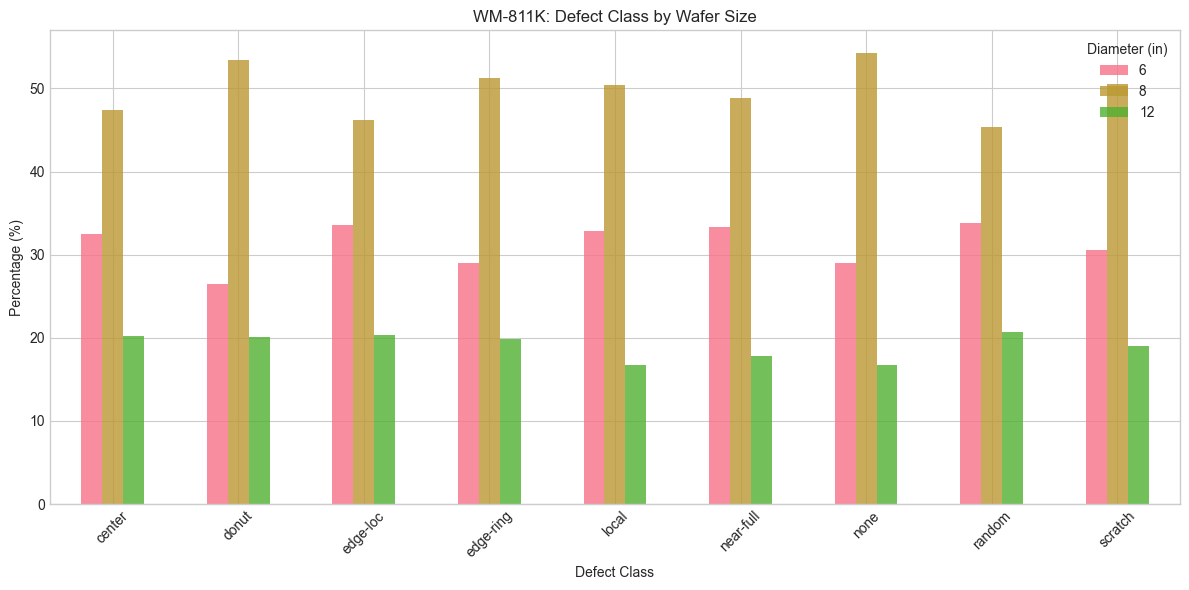

In [18]:
# Defect class vs Wafer size
fig, ax = plt.subplots(figsize=(12, 6))

crosstab = pd.crosstab(wm811k['defect_class'], wm811k['diameter'], normalize='index') * 100
crosstab.plot(kind='bar', ax=ax, alpha=0.8)
ax.set_xlabel('Defect Class')
ax.set_ylabel('Percentage (%)')
ax.set_title('WM-811K: Defect Class by Wafer Size')
ax.legend(title='Diameter (in)')
ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [19]:
# Summary statistics
print("=" * 60)
print("SUMMARY STATISTICS")
print("=" * 60)

print("\n--- SECOM Dataset ---")
print(f"Total samples: {len(secom_features)}")
print(f"Features: {secom_features.shape[1]}")
print(f"Pass rate: {pass_rate:.1f}%")
print(f"Missing values: {secom_features.isnull().sum().sum()} ({secom_features.isnull().sum().sum()/(secom_features.shape[0]*secom_features.shape[1])*100:.2f}%)")

print("\n--- WM-811K Dataset ---")
print(f"Total wafers: {len(wm811k)}")
print(f"Defect classes: {wm811k['defect_class'].nunique()}")
print(f"Wafer sizes: {sorted(wm811k['diameter'].unique())} inches")
print(f"Unique lots: {wm811k['lot_name'].nunique()}")

SUMMARY STATISTICS

--- SECOM Dataset ---
Total samples: 1567
Features: 591
Pass rate: 8.0%
Missing values: 46529 (5.02%)

--- WM-811K Dataset ---
Total wafers: 5000
Defect classes: 9
Wafer sizes: [np.int64(6), np.int64(8), np.int64(12)] inches
Unique lots: 99


## 3. Next Steps

Based on this exploration:

### SECOM
- **Class imbalance**: ~92% pass, 8% fail - need to handle this in training
- **Missing values**: Present in many features, need imputation strategy
- **Features**: 590 numerical features from sensors

### WM-811K
- **Multi-class**: 9 classes including 'none' (good wafers)
- **Imbalanced**: edge-ring, local, none, edge-loc are most common
- **Wafer sizes**: 6", 8", 12" - may need normalization

Ready for model training!